In [118]:
# Initialize the workspace
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter, OrderedDict, defaultdict
import string

# Always make it pretty.
plt.style.use('ggplot')
sns.set_style(style="whitegrid")
%matplotlib inline

In [2]:
# Examine a lyrics JSON and extract the relevant information
with open('Lyrics_21Savage.json') as f:
    data = json.load(f)

In [3]:
data.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'followers_count', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'iq', 'description_annotation', 'user', 'songs'])

In [12]:
# Artist name
data['name']

'21 Savage'

In [20]:
data['songs'][0]

{'annotation_count': 18,
 'api_path': '/songs/3138854',
 'full_title': 'Bank Account by\xa021\xa0Savage',
 'header_image_thumbnail_url': 'https://images.genius.com/0a9184d4ceac8b19e3e648a6cff136ec.300x169x1.jpg',
 'header_image_url': 'https://images.genius.com/0a9184d4ceac8b19e3e648a6cff136ec.1000x563x1.jpg',
 'id': 3138854,
 'lyrics_owner_id': 104344,
 'lyrics_state': 'complete',
 'path': '/21-savage-bank-account-lyrics',
 'pyongs_count': 144,
 'song_art_image_thumbnail_url': 'https://images.genius.com/7885b91f8d29c7b242f5f7926896f127.300x300x1.png',
 'song_art_image_url': 'https://images.genius.com/7885b91f8d29c7b242f5f7926896f127.1000x1000x1.png',
 'stats': {'unreviewed_annotations': 0,
  'concurrents': 5,
  'hot': False,
  'pageviews': 2538070},
 'title': 'Bank Account',
 'title_with_featured': 'Bank Account',
 'url': 'https://genius.com/21-savage-bank-account-lyrics',
 'primary_artist': {'api_path': '/artists/430404',
  'header_image_url': 'https://images.genius.com/52b1e86b08511e

In [21]:
# Title
data['songs'][0]['title_with_featured']

'Bank Account'

In [22]:
# URL
data['songs'][0]['url']

'https://genius.com/21-savage-bank-account-lyrics'

In [27]:
# Lyrics
data['songs'][0]['lyrics'].replace("\n", " ")

"Ooh, ooh, ooh, ow, ow, ow Wow, wow, ow, ah, ow, ah, ah, ah  I buy a new car for the bitch (for real) I tear down the mall with the bitch (for real) You can't even talk to the bitch (no) She fucking with bosses and shit (on God) I pull up in 'Rari's and shit (skrrr) With choppers and Harley's and shit (for real) I be Gucci'd down (Gucci) You wearing Lacoste and shit (bitch) Yeah, Moncler, yuh, fur came off a bear, yuh (yeah) Triple homicide, put me in a chair, yuh (in jail) Triple cross the plug, we do not play fair, yuh (on God) Got 'em tennis chains on and they real blingy (bling) Draco make you do the chicken head like Chingy (Chingy) Walk in Neiman Marcus and I spend a light fifty (fifty) Please proceed with caution, shooters, they be right with me (21) Bad bitch, cute face and some nice titties $7500 on a Saint Laurent jacket (yeah) Bitch, be careful when you dumpin' your ashes (bitch) I ain't no sucker, I ain't cuffin' no action (nah) The skreets raised me, I'm a whole bastard (w

In [82]:
### Putting it together for one artist

# Create lists for dataframe
artist = []
title = []
url = []
lyrics = []

# Examine a lyrics JSON and extract the relevant information
with open('Lyrics_21Savage.json') as f:
    data = json.load(f)
    
for idx in range(len(data['songs'])):
    # Artist name
    artist.append(str(data['name']))
    # Title
    title.append(str(data['songs'][idx]['title_with_featured']))
    # URL
    url.append(str(data['songs'][idx]['url']))
    # Lyrics
    lyrics.append(str(data['songs'][idx]['lyrics']))
                  #.replace("\n", " ")
                  #.replace("\u2005", " ")
                  #.replace("\u205f", " ")
                  #.replace("\'", ""))

In [74]:
print(lyrics)

["Ooh, ooh, ooh, ow, ow, ow\nWow, wow, ow, ah, ow, ah, ah, ah\n\nI buy a new car for the bitch (for real)\nI tear down the mall with the bitch (for real)\nYou can't even talk to the bitch (no)\nShe fucking with bosses and shit (on God)\nI pull up in 'Rari's and shit (skrrr)\nWith choppers and Harley's and shit (for real)\nI be Gucci'd down (Gucci)\nYou wearing Lacoste and shit (bitch)\nYeah, Moncler, yuh, fur came off a bear, yuh (yeah)\nTriple homicide, put me in a chair, yuh (in jail)\nTriple cross the plug, we do not play fair, yuh (on God)\nGot 'em tennis chains on and they real blingy (bling)\nDraco make you do the chicken head like Chingy (Chingy)\nWalk in Neiman Marcus and I spend a light fifty (fifty)\nPlease proceed with caution, shooters, they be right with me (21)\nBad bitch, cute face and some nice titties\n$7500 on a Saint Laurent jacket (yeah)\nBitch, be careful when you dumpin' your ashes (bitch)\nI ain't no sucker, I ain't cuffin' no action (nah)\nThe skreets raised me,

In [71]:
for x in range(len(data['songs'])):
    print(data['songs'][x]['lyrics'])

Ooh, ooh, ooh, ow, ow, ow
Wow, wow, ow, ah, ow, ah, ah, ah

I buy a new car for the bitch (for real)
I tear down the mall with the bitch (for real)
You can't even talk to the bitch (no)
She fucking with bosses and shit (on God)
I pull up in 'Rari's and shit (skrrr)
With choppers and Harley's and shit (for real)
I be Gucci'd down (Gucci)
You wearing Lacoste and shit (bitch)
Yeah, Moncler, yuh, fur came off a bear, yuh (yeah)
Triple homicide, put me in a chair, yuh (in jail)
Triple cross the plug, we do not play fair, yuh (on God)
Got 'em tennis chains on and they real blingy (bling)
Draco make you do the chicken head like Chingy (Chingy)
Walk in Neiman Marcus and I spend a light fifty (fifty)
Please proceed with caution, shooters, they be right with me (21)
Bad bitch, cute face and some nice titties
$7500 on a Saint Laurent jacket (yeah)
Bitch, be careful when you dumpin' your ashes (bitch)
I ain't no sucker, I ain't cuffin' no action (nah)
The skreets raised me, I'm a whole bastard (wi

In [76]:
for x in range(len(lyrics)):
    print(lyrics[x])

Ooh, ooh, ooh, ow, ow, ow
Wow, wow, ow, ah, ow, ah, ah, ah

I buy a new car for the bitch (for real)
I tear down the mall with the bitch (for real)
You can't even talk to the bitch (no)
She fucking with bosses and shit (on God)
I pull up in 'Rari's and shit (skrrr)
With choppers and Harley's and shit (for real)
I be Gucci'd down (Gucci)
You wearing Lacoste and shit (bitch)
Yeah, Moncler, yuh, fur came off a bear, yuh (yeah)
Triple homicide, put me in a chair, yuh (in jail)
Triple cross the plug, we do not play fair, yuh (on God)
Got 'em tennis chains on and they real blingy (bling)
Draco make you do the chicken head like Chingy (Chingy)
Walk in Neiman Marcus and I spend a light fifty (fifty)
Please proceed with caution, shooters, they be right with me (21)
Bad bitch, cute face and some nice titties
$7500 on a Saint Laurent jacket (yeah)
Bitch, be careful when you dumpin' your ashes (bitch)
I ain't no sucker, I ain't cuffin' no action (nah)
The skreets raised me, I'm a whole bastard (wi

In [83]:
# Place data into dataframe
d = {'Artist':artist, 'Title':title, 'URL':url, 'Lyrics':lyrics}
df = pd.DataFrame(data=d)

In [126]:
counter = Counter()
#for word in df['Lyrics'][0].split():
#    print(word)
result = []
table = str.maketrans("","", string.punctuation.replace("'", ""))
for song in df['Lyrics'].values:
    result.extend(song.translate(table).split())
result

['Ooh',
 'ooh',
 'ooh',
 'ow',
 'ow',
 'ow',
 'Wow',
 'wow',
 'ow',
 'ah',
 'ow',
 'ah',
 'ah',
 'ah',
 'I',
 'buy',
 'a',
 'new',
 'car',
 'for',
 'the',
 'bitch',
 'for',
 'real',
 'I',
 'tear',
 'down',
 'the',
 'mall',
 'with',
 'the',
 'bitch',
 'for',
 'real',
 'You',
 "can't",
 'even',
 'talk',
 'to',
 'the',
 'bitch',
 'no',
 'She',
 'fucking',
 'with',
 'bosses',
 'and',
 'shit',
 'on',
 'God',
 'I',
 'pull',
 'up',
 'in',
 "'Rari's",
 'and',
 'shit',
 'skrrr',
 'With',
 'choppers',
 'and',
 "Harley's",
 'and',
 'shit',
 'for',
 'real',
 'I',
 'be',
 "Gucci'd",
 'down',
 'Gucci',
 'You',
 'wearing',
 'Lacoste',
 'and',
 'shit',
 'bitch',
 'Yeah',
 'Moncler',
 'yuh',
 'fur',
 'came',
 'off',
 'a',
 'bear',
 'yuh',
 'yeah',
 'Triple',
 'homicide',
 'put',
 'me',
 'in',
 'a',
 'chair',
 'yuh',
 'in',
 'jail',
 'Triple',
 'cross',
 'the',
 'plug',
 'we',
 'do',
 'not',
 'play',
 'fair',
 'yuh',
 'on',
 'God',
 'Got',
 "'em",
 'tennis',
 'chains',
 'on',
 'and',
 'they',
 'real',
 

In [135]:
counts = Counter(result).most_common(20)
words = []
numbers = []
for word, number in counts:
    words.append(word)
    numbers.append(number)

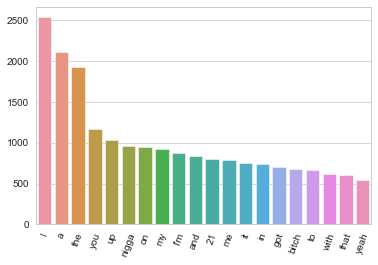

In [137]:
fig, ax = plt.subplots()
sns.barplot(x=words, y=numbers)
for tick in ax.get_xticklabels():
    tick.set_rotation(70)

In [ ]:
### Putting it together for all artists

# Create lists for dataframe
artist = []
title = []
url = []
lyrics = []

# Examine a lyrics JSON and extract the relevant information
with open('Lyrics_21Savage.json') as f:
    data = json.load(f)
    
for idx in range(len(data['songs'])):
    # Artist name
    artist.append(str(data['name']))
    # Title
    title.append(str(data['songs'][idx]['title_with_featured']))
    # URL
    url.append(str(data['songs'][idx]['url']))
    # Lyrics
    lyrics.append(str(data['songs'][idx]['lyrics']))

In [152]:
# Create lists for dataframe
artist = []
title = []
url = []
lyrics = []
for path, subdir, files in os.walk(r'C:\Users\Broderick\Documents\assignments\RapLyrics\data\jsons'):
    for file in files:
        with open(os.path.join(path,file)) as f:
            data = json.load(f)
        for idx in range(len(data['songs'])):
            # Artist name
            artist.append(str(data['name']))
            # Title
            title.append(str(data['songs'][idx]['title_with_featured']))
            # Album
            # Producer
            # Release Date
            # URL
            url.append(str(data['songs'][idx]['url']))
            # Lyrics
            lyrics.append(str(data['songs'][idx]['lyrics']))

In [158]:
# Place data into dataframe
d = {'Artist':artist, 'Title':title, 'URL':url, 'Lyrics':lyrics}
df = pd.DataFrame(data=d)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27157 entries, 0 to 27156
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Artist  27157 non-null  object
 1   Title   27157 non-null  object
 2   URL     27157 non-null  object
 3   Lyrics  27157 non-null  object
dtypes: object(4)
memory usage: 848.8+ KB


In [160]:
df.describe()

Artist  Title                                                URL  \
count       27157  27157                                              27157   
unique        100  25903                                              27157   
top     Lil Wayne  Intro  https://genius.com/Chief-keef-trying-not-to-sw...   
freq         1182     46                                                  1   

                                                   Lyrics  
count                                               27157  
unique                                              26318  
top               \n            Lyrics for this song h...  
freq                                                  438

In [173]:
df['Artist'].value_counts().index.values

array(['Lil Wayne', 'Gucci Mane', 'Chief Keef', 'Young Thug', 'The Game',
       'Soulja Boy Tell ’Em', 'Snoop Dogg', '2Pac', 'Kanye West', 'E-40',
       'Meek Mill', 'Eminem', 'Future', 'Drake', 'Mac Miller', 'Jeezy',
       'Wale', 'Rick Ross', '50 Cent', 'T.I.', 'Migos', 'Nas',
       'Big K.R.I.T.', 'JAY-Z', 'Lupe Fiasco', 'Too $hort',
       'Lil Uzi Vert', 'Busta Rhymes', 'Nicki Minaj', 'DMX', '2 Chainz',
       'Cam’ron', 'J. Cole', 'Mobb Deep', 'Beastie Boys', 'KRS-One',
       'Twista', 'The Roots', 'Public Enemy', 'Bone Thugs-N-Harmony',
       'Talib Kweli', 'Travis Scott', 'Nipsey Hussle', 'LL Cool J',
       'De La Soul', 'Big Sean', 'Common', 'Ice Cube', 'Freddie Gibbs',
       'Jadakiss', 'Kid Cudi', 'Tyler, The Creator', 'Ludacris',
       'Scarface', 'Redman', 'Bow Wow', 'A$AP Rocky', 'Action Bronson',
       'Nelly', 'YG', 'BROCKHAMPTON', 'Wu-Tang Clan', 'Ja Rule',
       'Danny Brown', 'Lil’ Kim', 'Trina', 'Missy Elliott', 'Yasiin Bey',
       'Chance the Rapper', '

In [167]:
rapper_list = (['Run-DMC', 'KRS-One', 'LL Cool J', 'Beastie Boys',
                'Public Enemy', 'Eazy-E', 'Slick Rick', 'Big Daddy Kane',
                'Ice-T', 'Salt-N-Pepa', 'A Tribe Called Quest', 'Heavy D',
                'Ice Cube', 'Too $hort', 'De La Soul', 'MC Hammer',
                'Redman', 'Snoop Dogg', 'Outkast', 'Jay-Z',
                'Scarface', 'Nas', '2Pac', 'The Notorious B.I.G.',
                'Wu-Tang Clan', 'DMX', 'Foxy Brown', 'Mobb Deep',
                'Bone Thugs-N-Harmony', 'Busta Rhymes', 'Milo', 'Mos Def',
                '50 Cent', 'Missy Elliott', 'Common', 'E-40',
                'Eminem', 'Lil Wayne', 'Ludacris', 'Kanye West',
                'T.I.', 'Nelly', 'The Game', 'J. Cole',
                'Twista', 'Jadakiss', 'Jeezy', 'Talib Kweli',
                'Drake', 'Gucci Mane', 'Eve', 'Rick Ross',
                "Cam'ron", 'Meek Mill', 'Lil Kim', 'Ja Rule',
                'Remy Ma', 'Bow Wow', 'Chingy', 'Soulja Boy',
                'Young Dro', 'Future', 'Travis Scott', 'Big Sean',
                'ASAP Rocky', 'Tyler, the Creator', 'Lil Uzi Vert', 'JID',
                'Denzy Curry', 'Joey Bada$$', 'Chance the Rapper', 'Kid Cudi',
                'Nipsey Hussle', 'Clipse', 'Young Thug', '21 Savage',
                'Schoolboy Q', 'ASAP Ferg', '2 Chainz', 'Nicki Minaj',
                'Migos', 'YG', 'Danny Brown', 'Freddie Gibbs',
                'Jay Rock', 'Lupe Fiasco', 'Vince Staples', 'Wale',
                'Chief Keef', 'Earl Sweatshirt', 'Rapsody', 'Mac Miller',
                'Trina', 'Cardi B', 'Action Bronson', 'The Roots',
                'Maxo Kream', 'Brockhampton', 'Smino', 'Big KRIT'])

In [180]:
df['Artist'].unique()#value_counts().index.values

array(['21 Savage', '2 Chainz', '2Pac', '50 Cent', 'A$AP Ferg',
       'A$AP Rocky', 'Action Bronson', 'A Tribe Called Quest',
       'Beastie Boys', 'Big Daddy Kane', 'Big K.R.I.T.', 'Big Sean',
       'Bone Thugs-N-Harmony', 'Bow Wow', 'BROCKHAMPTON', 'Busta Rhymes',
       'Cam’ron', 'Cardi B', 'Chance the Rapper', 'Chief Keef', 'Chingy',
       'Clipse', 'Common', 'Danny Brown', 'De La Soul', 'Denzel Curry',
       'DMX', 'Drake', 'E-40', 'Earl Sweatshirt', 'Eazy-E', 'Eminem',
       'Eve', 'Foxy Brown', 'Freddie Gibbs', 'Future', 'Gucci Mane',
       'Heavy D', 'Ice Cube', 'Ice-T', 'J. Cole', 'Jadakiss',
       'Jamila Woods', 'Ja Rule', 'Jay Rock', 'JAY-Z', 'Jeezy', 'JID',
       'Joey Bada$$', 'Kanye West', 'Kid Cudi', 'KRS-One', 'Lil’ Kim',
       'Lil Uzi Vert', 'Lil Wayne', 'LL Cool J', 'Ludacris',
       'Lupe Fiasco', 'Mac Miller', 'Maxo Kream', 'MC Hammer',
       'Meek Mill', 'Migos', 'Missy Elliott', 'Mobb Deep', 'Nas', 'Nelly',
       'Nicki Minaj', 'Nipsey Hussle', 'Ou

In [188]:
df[df['Artist'] == 'Drake']['Title'].values

array(["God's Plan", 'In My Feelings', 'Hotline Bling',
       'One Dance (Ft.\xa0Kyla & Wizkid)',
       "Hold On, We're Going Home (Ft.\xa0Majid\xa0Jordan)",
       'Know Yourself', 'Back to Back',
       'All Me (Ft.\xa02\xa0Chainz & Big\xa0Sean)', 'Fake Love',
       'From Time (Ft.\xa0Jhené\xa0Aiko)', '0 to 100 / The Catch Up',
       'The Motto (Ft.\xa0Lil\xa0Wayne)', 'Started from the Bottom',
       'Pound Cake / Paris Morton Music 2 (Ft.\xa0JAY-Z)',
       'HYFR (Ft.\xa0Lil\xa0Wayne)', "Marvin's Room", 'Nice For What',
       'Passionfruit', "Child's Play", 'Energy',
       'Too Good (Ft.\xa0Rihanna)', 'Furthest Thing', 'Jungle',
       'Over My Dead Body', 'Worst Behavior', 'Summer Sixteen',
       'The Language', 'Girls Love Beyoncé (Ft.\xa0James\xa0Fauntleroy)',
       'How Bout Now', 'Too Much', 'Shot for Me', 'Legend',
       'Portland (Ft.\xa0Quavo & Travis\xa0Scott)', 'Nonstop',
       'Controlla', 'Gyalchester', 'U With Me?',
       'Own It (Ft.\xa0PARTYNEXTDOOR)', 'He

['and', 'they', "wishin'", 'and', "wishin'", 'and', "wishin'", 'and', "wishin'", 'they', "wishin'", 'on', 'me', 'yeah', 'i', 'been', "movin'", 'calm', "don't", 'start', 'no', 'trouble', 'with', 'me', 'tryna', 'keep', 'it', 'peaceful', 'is', 'a', 'struggle', 'for', 'me', "don't", 'pull', 'up', 'at', '6', 'am', 'to', 'cuddle', 'with', 'me', 'you', 'know', 'how', 'i', 'like', 'it', 'when', 'you', "lovin'", 'on', 'me', 'i', "don't", 'wanna', 'die', 'for', 'them', 'to', 'miss', 'me', 'yes', 'i', 'see', 'the', 'things', 'that', 'they', "wishin'", 'on', 'me', 'hope', 'i', 'got', 'some', 'brothers', 'that', 'outlive', 'me', 'they', "gon'", 'tell', 'the', 'story', 'shit', 'was', 'different', 'with', 'me', "god's", 'plan', "god's", 'plan', 'i', 'hold', 'back', 'sometimes', 'i', "won't", 'yuh', 'i', 'feel', 'good', 'sometimes', 'i', "don't", 'ayy', "don't", 'i', 'finessed', 'down', 'weston', 'road', 'ayy', "'nessed", 'might', 'go', 'down', 'a', 'god', 'yeah', 'wait', 'i', 'go', 'hard', 'on', 'sou

['too', 'rich', 'for', 'who', "y'all", 'just', 'got', 'rich', 'again', 'who', 'grips', 'the', 'mic', 'and', 'likes', 'to', 'kill', 'they', 'friends', "i've", 'never', 'been', 'the', 'type', 'to', 'make', 'amends', 'if', 'shit', 'was', 'at', 'a', 'eight', 'we', 'like', 'to', 'we', 'like', 'to', 'we', 'like', 'to—', 'yeah', 'if', 'shit', 'was', 'at', 'a', 'eight', 'we', 'like', 'to', 'make', 'it', 'ten', '1da', 'sent', 'this', 'in', "i'm", "goin'", 'up', 'all', 'the', 'way', 'i', "don't", 'like', 'to', 'talk', 'when', "there's", "nothin'", 'else', 'left', 'to', 'say', 'true', 'drizzy', "'bout", 'to', 'drop', 'the', 'game', 'is', 'in', 'disarray', "i'd", 'tell', 'you', 'hear', 'me', 'out', 'but', 'we', 'both', 'know', 'end', 'of', 'the', 'day', 'your', 'sister', 'is', "pressin'", 'play', 'your', 'trainer', 'is', "pressin'", 'play', 'your', 'wifey', 'your', 'wifey', 'your', 'wifey', 'your', 'wifey—', 'true', 'i', 'gotta', 'breathe', 'real', 'deep', 'when', 'i', 'catch', 'an', 'attitude', '

['check', 'look', 'and', 'i', "ain't", 'tryna', 'get', 'to', 'know', 'nobody', 'but', 'you', 'do', 'me', 'a', 'favor', 'tell', 'me', "what's", "happenin'", 'i', 'am', "drinkin'", 'xo', 'd', 'is', "sippin'", 'some', 'appleton', 'usually', 'the', 'things', 'i', 'desire', 'i', 'always', 'apprehend', 'back', 'again', 'return', 'of', 'the', 'mack', 'again', "'deceiving'", 'was', 'cool', "i'll", 'never', 'record', 'the', 'track', 'again', 'even', 'though', 'my', 'ex', 'is', "fuckin'", 'one', 'of', 'my', 'rapper', 'friends', 'i', "don't", 'wanna', 'seem', 'like', 'i', 'am', 'always', 'attacking', 'them', 'verbally', 'you', 'can', 'stop', "frontin'", 'i', 'know', 'you', 'heard', 'of', 'me', 'babygirl', 'ya', 'ya', 'ya', 'heard', 'of', 'me', 'little', 'me', 'pay', 'attention', 'i', 'guarantee', 'you', "it'll", 'be', 'one', 'of', 'the', 'best', 'decisions', "you've", 'made', "i'm", "sonnin'", 'them', 'all', 'i', 'live', 'in', 'the', 'shade', 'previously', 'mischievous', 'behaviour', 'was', 'the'

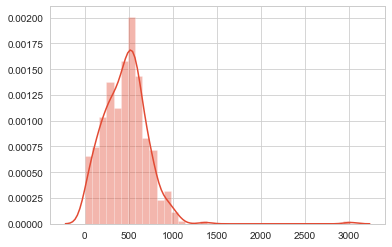

In [219]:
word_counts = []
table = str.maketrans("","", string.punctuation.replace("'", ""))
for song in df[df['Artist'] == 'Drake']['Lyrics'].values:
    word_counts.append(len(song.lower().translate(table).split()))
    print(song.lower().translate(table).split())
    print((set(song.lower().translate(table).split())))
fig, ax = plt.subplots()
sns.distplot(word_counts, ax=ax)

In [ ]:
for song in df[df['Artist'] == 'Drake']['Lyrics'].values:
    print(len(song.split()))
    df[df['Artist'] == 'Drake']

In [221]:
drakesongs = df[df['Artist'] == 'Drake']['Title'].values
df[df['Artist'] == 'Drake']['Title'].tail(20)

7008          Cannonball (Snippet) (Ft. Colin Munroe)
7009                   Time Flies (Demo) (Ft. Future)
7010                           MSG Freestyle (Hot 97)
7011                                             Hozh
7012                                   Never 'Bout Us
7013                                     One Man Show
7014                                   Take Your Girl
7015                  Work (Demo) (Ft. PARTYNEXTDOOR)
7016    Started From the Bottom Deluxe - Don't Delete
7017                            Statement on Wireless
7018                     Tweets With T. Boone Pickens
7019                   Organization (Ft. Smiley_61st)
7020                Congratulations (Mixtape Version)
7021                      Body 2 Body (Ft. Soundbwoy)
7022                Pop Style (Demo) (Ft. Kanye West)
7023                                         Using Me
7024                                       Drake2.mp4
7025           Legendary Shit prod NFF (Ft. Prod NFF)
7026           Marvin's Room

In [218]:
for title, count in zip(drakesongs, word_counts):
    print(title, count)

God's Plan 347
In My Feelings 557
Hotline Bling 439
One Dance (Ft. Kyla & Wizkid) 394
Hold On, We're Going Home (Ft. Majid Jordan) 302
Know Yourself 558
Back to Back 526
All Me (Ft. 2 Chainz & Big Sean) 1023
Fake Love 474
From Time (Ft. Jhené Aiko) 744
0 to 100 / The Catch Up 953
The Motto (Ft. Lil Wayne) 526
Started from the Bottom 463
Pound Cake / Paris Morton Music 2 (Ft. JAY-Z) 1029
HYFR (Ft. Lil Wayne) 592
Marvin's Room 567
Nice For What 736
Passionfruit 228
Child's Play 627
Energy 500
Too Good (Ft. Rihanna) 545
Furthest Thing 601
Jungle 429
Over My Dead Body 612
Worst Behavior 547
Summer Sixteen 621
The Language 641
Girls Love Beyoncé (Ft. James Fauntleroy) 431
How Bout Now 518
Too Much 661
Shot for Me 401
Legend 399
Portland (Ft. Quavo & Travis Scott) 675
Nonstop 684
Controlla 404
Gyalchester 367
U With Me? 602
Own It (Ft. PARTYNEXTDOOR) 530
Headlines 595
Fire & Desire 340
Doing It Wrong 364
Crew Love (Ft. The Weeknd) 365
Wu-Tang Forever 536
Look What You've Done 770
I'm Upset 4

In [507]:
def plot_word_counts(df, artist):
    '''
    Given an artist, this function plots histograms associated with that
    artist's word counts in lyrics.

    Parameters:
    artist (string): the artist of interest
    df (dataframe): dataframe
    '''
    fig, axs = plt.subplots(2, 1, figsize=(8,12))
    counts = []
    unique_counts = []
    table = str.maketrans("","", string.punctuation.replace("'", ""))
    
    for song in df[df['Artist'] == artist]['Lyrics'].values:
        counts.append(len(song.lower().translate(table).split()))
        unique_counts.append(len(set(song.lower().translate(table).split())))
    
    sns.distplot(counts, ax=axs[0], kde=False, color='mediumslateblue')
    axs[0].set_title(f'Total Word Counts in Songs by {artist}')
    axs[0].set_xlabel('Total Words')
    axs[0].set_ylabel('Counts')
    
    sns.distplot(unique_counts, ax=axs[1], kde=False, color='slateblue')
    axs[1].set_title(f'Unique Word Counts in Songs by {artist}')
    axs[1].set_xlabel('Unique Words')
    axs[1].set_ylabel('Counts')
    plt.show()

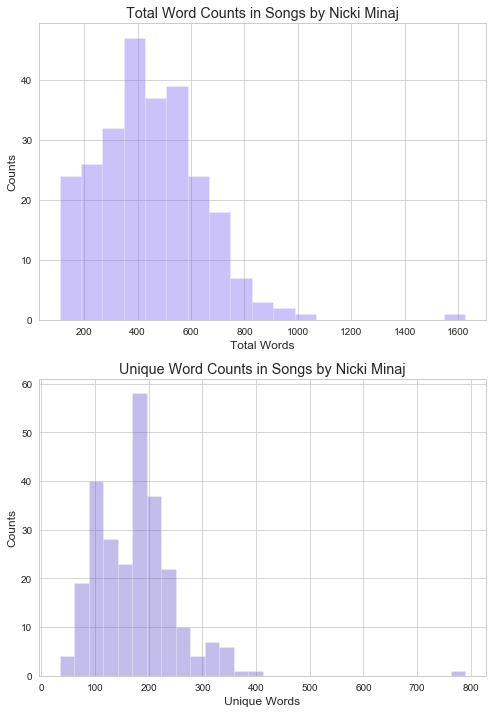

In [508]:
plot_word_counts(df, 'Nicki Minaj')

In [228]:
lyrics_word_count = []
for song in df['Lyrics'].values:
    lyrics_word_count.append(len(song.lower().translate(table).split()))
len(lyrics_word_count)

27157

In [230]:
df['Word Count'] = lyrics_word_count

In [249]:
# Inspecting songs with word counts below 100
for song in df[df['Word Count'] < 100]['Lyrics'].values:
    print(song)
    print('_____________________')

Lyrics from Snippet

 hoe ass nigga in the met
Niggas keep talkin' that U.K. shit like I don't got AKs
Like, 'cause I was born overseas, these muhfuckers ain't gon' spray-spray
Pull up in your hood, nigga, 9-1-1, y'all better call mayday
From Glenwood all the way to Martin Luther King, niggas know we don't play-play
_____________________
Lyrics will be available upon release. Stay tuned!
_____________________
Lyrics from Snippet

 all these feelings I done hurt
Gun smoke, broad day
Nigga, gun smoke, late night
Nigga, gun smoke, any time
Gun smoke, anybody
Nigga, we got plenty bodies
We'll come and see about it
Got your buddy killed about it
Y'all ain't did shit about it, pussy
You know how I'm rockin' in this bitch, pussy
You know it get to poppin' in this bitch, pussy
I ain't goin' to war about a bitch, pussy
I ain't talkin' to the law about shit, pussy
_____________________
Lyrics from Snippet

No stressin'
Metro Boomin want some more, nigga!
No stressin'
I troop, lil' nigga I bless 

Ay what it do daddy?
Honey girl, Queen Bee, Lil' Kim
Ay cut that new Gucci Mane mixtape
Burrrprint(2), HD baby
Understand me? That joint G'D up
Just like my Gucci bag! {*laughing*}
So I guess that make me Gucci girl
Yeah, ay Gucci baby miss you baby
We need you hommmme free Gucci Mane!
Free Gucci Mane
Can't wait to see you potnah
_____________________

_____________________
DJ Holiday, what's happening, what's good? All my DJ niggas, I'm fuckin witcha. On my planet, So Icy shit, nigga. Talmbout DJ niggas out there getting money, man. I'm fuckin witcha the long way. What's up to all my thugs out there, man, in the trap, man? Southside, what's up, man? Eastside, what it do, man? Westside, Northside, man. It's big Gucci, nigga. You know how we rockin, nigga. So Icy Boys in the building. 1017 Brick Squad, nigga. It's a movement, nigga. You know what? We smashing any nigga. Any nigga!
_____________________
Gucci frames makin it hard for me to see
I'm in the club thinking like I'm in the str

_____________________
(WARNING: This is from a snippet on Instagram; this is not the FULL SONG)
We will be here forever, you understand?
Forever & ever, & ever & ever
Hey, this black man made it in America, basketball &  get the hell out the area
Nowadays niggas kill when you get ahead of 'em, so i backtrack to get 'em to act right
'Cause they confuse the rap life for the trap life
Mentally i ain't the rap type, you fuck with me your situations 
This money music, that means you get offended , these words like liquor & 
Momma taught-
_____________________
Can't take this shit
Like giancarlo can't take danielle gerard's tits
_____________________
Pump Makaveli in the car
Until my girl get in
Her pain in the ass want DeBarge
_____________________
http://www.everyonetobuy.com/high-power-red-laser-pointer-50mw.html
50mw laser with rubberized black finish, looks elegant in style. Aviation aluminum with silver plated, feels smooth and nice. Output power only 5mW ,could better protect your eye

In [252]:
# Inspecting songs with word counts below 100
df[df['Word Count'] > 2000]

Artist  \
918                    2Pac   
2129           Beastie Boys   
3057   Bone Thugs-N-Harmony   
3059   Bone Thugs-N-Harmony   
4047                Cam’ron   
7005                  Drake   
7878                 Eminem   
8079                 Eminem   
8099                 Eminem   
8207                 Eminem   
10717               J. Cole   
10908               J. Cole   
11760                 JAY-Z   
11821                 JAY-Z   
12397           Joey Bada$$   
12586            Kanye West   
12752            Kanye West   
12756            Kanye West   
12841            Kanye West   
13269              Kid Cudi   
14310             Lil Wayne   
14850             Lil Wayne   
15752           Lupe Fiasco   
16038           Lupe Fiasco   
16087           Lupe Fiasco   
16778             Meek Mill   
17242                 Migos   
18634           Nicki Minaj   
22947              The Game   
22953              The Game   
22967              The Game   
23886             The Roots   
25179    Tyler, The Creator   
25212    Tyler, The Creator   
26488            Young Thug   

                                                   Title  \
918    Tupac & Monster Kody Phone Conversation Octobe...   
2129                                   Ill Communication   
3057                       Fastest Rap Song (Ft. Twista)   
3059                        20th Year Anniversary Cypher   
4047   Dipset Hot 97 Freestyle (Ft. Hell Rell & J.R. ...   
7005                    ESPYs Conference Call (Ft. ESPN)   
7878   Eminem Freestyles on Tim Westwood | 2009 (Ft. ...   
8079              '99 Tim Westwood Freestyle (Ft. Proof)   
8099   2004 Tim Westwood Freestyle (Ft. D12, Stat Quo...   
8207   Rolling Stone Q/A Exclusive 2013 (Ft. Brian Hi...   
10717                                       Note to Self   
10908                                         Reddit AMA   
11760  Appearance on Real Time with Bill Maher (Ft. A...   
11821  RD20 (Ft. Briant "B-High" Biggs, Clark Kent, D...   
12397  Third Eye Shit / Suspect (Ft. Capital STEEZ, C...   
12586                                          Last Call   
12752                             Tim Westwood Freestyle   
12756                                     Oxford Lecture   
12841                              On Genius and Fashion   
13269                          Hi, I'm Scott (TEDx Talk)   
14310                                        10,000 Bars   
14850                       Gone 'Til November (Excerpt)   
15752  Chopper (Ft. Billy Blue, Buk, Fam-Lay, Glasses...   
16038            Philosophy Sunday (Uomo Mangiato Tigre)   
16087                               The Police: A Letter   
16778       2014 HHS1987 Freestyle (Ft. Omelly & Takbar)   
17242                             Tim Westwood Freestyle   
18634       Press Conference (Ft. Charlemagne & Safaree)   
22947                                 300 Bars & Runnin'   
22953                             400 Bars (The Skeemix)   
22967                             Daytona 500 (500 Bars)   
23886         The Session (Longest Posse Cut in History)   
25179  FLOWER BOY: a conversation (Ft. Jerrod Carmich...   
25212                       Cherry Bomb: The Documentary   
26488                           Thug N 30 (Ft. HiDoraah)   

                                                     URL  \
918    https://genius.com/2pac-tupac-and-monster-kody...   
2129   https://genius.com/Beastie-boys-ill-communicat...   
3057   https://genius.com/Bone-thugs-n-harmony-fastes...   
3059   https://genius.com/Bone-thugs-n-harmony-20th-y...   
4047   https://genius.com/Camron-dipset-hot-97-freest...   
7005   https://genius.com/Drake-espys-conference-call...   
7878   https://genius.com/Eminem-eminem-freestyles-on...   
8079   https://genius.com/Eminem-99-tim-westwood-free...   
8099   https://genius.com/Eminem-2004-tim-westwood-fr...   
8207   https://genius.com/Eminem-rolling-stone-q-a-ex...   
10717      https://genius.com/J-cole-note-to-self-lyrics   
10908        https://ge

In [290]:
for value in df[(df['Title'].str.contains(r"Demo\)")
                 | df['Title'].str.contains(r"\(Demo")
                 | df['Title'].str.contains(r"\[Demo"))]['Title'].values:
    print(value)

Whole Lot (Demo) (Ft. Young Thug)
X (Demo)
Alien (Demo)
Things R Changing (Demo Version)
Holler If Ya Hear Me (Demo Version) (Ft. Live Squad)
Run Tha Streetz (Demo Version 3) (Ft. Michel'le & Napoleon (Outlawz))
Run Tha Streetz (Demo Version) (Ft. E.D.I. Mean & Napoleon (Outlawz))
Mad Man (Demo) (Ft. Playboi Carti)
Scenario (Demo 2) (Ft. Jarobi & Leaders of the New School)
Scenario (Demo 1) (Ft. Chris Lighty, Leaders of the New School, Mista Lawnge & Posdnuos)
Egg Raid on Mojo (Demo version)
"Transit Cop" (Demo Version)
Ultralight Beam (Demo)
BLEACH (Demo) (Ft. Ryan Beatty)
1999 WILDFIRE (Demo) (Ft. Jazze Pha)
Use Me (Demo)
Waves (Demo)
Brain Cells (Demo)
Successful (Demo)
From Florida with Love (Original Demo)
From Time (Demo) (Ft. Jhené Aiko)
Belong to the City (Demo)
Desires (Demo) (Ft. Future)
My Love (Demo)
Too Good (Demo) (Ft. Rihanna)
Too Good (Solo Demo)
God’s Plan (Demo) (Ft. Trippie Redd)
Pain 1993 (Demo) (Ft. Playboi Carti)
Time Flies (Demo) (Ft. Future)
Work (Demo) (Ft. PAR

In [328]:
for value in df[(df['Title'].str.lower().str.contains(r"interview\)")
                 | df['Title'].str.lower().str.contains(r"\(interview")
                 | df['Title'].str.lower().str.contains(r"\[interview"))]['Title'].values:
    print(value)

In [299]:
for value in df[(df['Title'].str.contains(r"Unreleased\)")
                 | df['Title'].str.contains(r"\(Unreleased")
                 | df['Title'].str.contains(r"\[Unreleased"))]['Title'].values:
    print(value)

Peep Game Part 2 (Unreleased)
Fake Ass Bitches (Unreleased Re-Recording)
Basket Case ('96 Sho Shot) [Unreleased] (Ft. Greg Nice)
Intergalactic (Unreleased Version)
Earthquake* (Unreleased)
Corrupt/I Remember (Unreleased)
All In (Unreleased)
The Kids (Unreleased Demo)
Slim Shady (Unreleased)
You Don't Wanna Fuck Wit These (Unreleased '93 Shit)
Old Town Road (Unreleased Version)
Fire (Unreleased)
Ether (Unreleased Edition)
The What (Unreleased Version) (Ft. Method Man)
Nasty Boy (Unreleased Version) (Ft. Janet Jackson)
Tsunami (Unreleased Snippet)*
What you wanna poo (Unreleased) (Ft. Anthony Hamilton & Stuey Rock & T.I.)


In [296]:
for value in df[df['Title'].str.contains(r"\(Leak")
                | df['Title'].str.contains(r"\[Leak")]['Title'].values:
    print(value)

Living Single (Leak) (Ft. Chance the Rapper, Jeremih & Smino)
Controlla (Leak) (Ft. Popcaan)
Cut Back (Leak)


In [300]:
for value in df[(df['Title'].str.lower().str.contains(r"excerpt\)")
                 | df['Title'].str.lower().str.contains(r"\(excerpt")
                 | df['Title'].str.lower().str.contains(r"\[excerpt"))]['Title'].values:
    print(value)

LUV (Excerpt)
Decoded: Part 1 (Excerpts)
Decoded: Part 2 (Excerpts)
Decoded: Part 3 (Excerpts)
Decoded: Epilogue (Excerpts)
Decoded: Part 4 (Excerpts)
Gone 'Til November (Excerpt)
Once Upon a Time in Shaolin (Excerpt) (Ft. Cher)


In [301]:
for value in df[(df['Title'].str.lower().str.contains(r"tedx\)")
                 | df['Title'].str.lower().str.contains(r"\(tedx")
                 | df['Title'].str.lower().str.contains(r"\[tedx"))]['Title'].values:
    print(value)

Hi, I'm Scott (TEDx Talk)


In [333]:
for value in df[(df['Title'].str.lower().str.contains("press conference"))]['Title'].values:
    print(value)

Press Conference (Ft. Charlemagne & Safaree)


In [326]:
for value in df[(df['Title'].str.lower().str.contains("tweets"))]['Title'].values:
    print(value)

Tweets With T. Boone Pickens
Tweets About The Rap Industry
Tweets About Lean
Tweets About New Album and New Rules
Tweets on Tidal's Status
Tweets
Tweets: July 21, 2015


In [320]:
for value in df[(df['Title'].str.lower().str.contains("reddit"))]['Title'].values:
    print(value)

Reddit AMA (Ft. /r/AskReddit)
Reddit AMA
Reddit AMA (Ft. /r/AskReddit)


In [331]:
for value in df[(df['Title'].str.contains("Rolling Stone"))]['Title'].values:
    print(value)

Tupac Shakur - Rolling Stone Entry
Q&A with Rolling Stone (Comments on Labels)
Rolling Stone (Ft. Petite Noir)
Tough Day at the Office [Rolling Stone Apology]
Rolling Stone Q/A Exclusive 2013 (Ft. Brian Hiatt)
Rolling Stone (Ft. Lil B)
Rolling Stone Cover 2/25/2016
Rolling Stone (Ft. Black Hippy)


In [342]:
def clean_df(df):
    '''
    Given a dataframe, this function drops rows for songs that are
    snippets, demos, or otherwise incomplete.

    Parameters:
    df (dataframe): dataframe
    '''
    # Remove songs with < 100 words (typically skits/incomplete songs)
    df.drop(df[df['Word Count'] < 100].index, inplace=True)
        # Remove songs with > 3000 words (typically noise/non-songs)
    df.drop(df[df['Word Count'] > 3000].index, inplace=True)
    # Remove demos
    df.drop(df[(df['Title'].str.contains(r"Demo\)")
                | df['Title'].str.contains(r"\(Demo")
                | df['Title'].str.contains(r"\[Demo"))].index,
            inplace=True)
    # Remove snippets
    df.drop(df[(df['Title'].str.lower().str.contains(r"snippet\)")
                | df['Title'].str.lower().str.contains(r"\(snippet")
                | df['Title'].str.lower().str.contains(r"\[snippet"))]
            .index, inplace=True)
    # Remove unreleased tracks
    df.drop(df[(df['Title'].str.contains(r"Unreleased\)")
                | df['Title'].str.contains(r"\(Unreleased")
                | df['Title'].str.contains(r"\[Unreleased"))].index,
            inplace=True)
    # Remove leaks
    df.drop(df[df['Title'].str.contains(r"\(Leak")
               | df['Title'].str.contains(r"\[Leak")].index, inplace=True)
    # Remove excerpts
    df.drop(df[(df['Title'].str.lower().str.contains(r"excerpt\)")
                | df['Title'].str.lower().str.contains(r"\(excerpt")
                | df['Title'].str.lower().str.contains(r"\[excerpt"))]
            .index, inplace=True)
    # Remove Ted Talks
    df.drop(df[(df['Title'].str.lower().str.contains(r"tedx\)")
                | df['Title'].str.lower().str.contains(r"\(tedx")
                | df['Title'].str.lower().str.contains(r"\[tedx"))].index, inplace=True)
    # Remove Instagram content
    df.drop(df[(df['Title'].str.lower().str.contains("instagram"))]
            .index, inplace=True)
    # Remove Twitter content
    df.drop(df[(df['Title'].str.lower().str.contains("tweets"))].index,
            inplace=True)
    df.drop(df[(df['Title'].str.lower().str.contains("twitter"))].index,
            inplace=True)
    # Remove Reddit content
    df.drop(df[(df['Title'].str.lower().str.contains("reddit"))].index,
            inplace=True)
    # Remove Facebook content
    df.drop(df[(df['Title'].str.lower().str.contains("facebook"))].index,
            inplace=True)
    # Remove Live songs to reduce redundancy
    # Reset the indices
    df.reset_index(drop=True, inplace=True)
    return df

In [332]:
df[df['Word Count'] < 100].index

Int64Index([   95,   102,   118,   120,   122,   124,   125,   131,   133,
              134,
            ...
            27142, 27143, 27144, 27145, 27146, 27147, 27149, 27153, 27154,
            27156],
           dtype='int64', length=1849)

In [343]:
df = clean_df(df)

In [344]:
df.tail(20)

Artist                                              Title  \
25018  Young Thug                       No Hysiding (Ft. Solo Lucci)   
25019  Young Thug                Woah Woah Woah* (Ft. Ty Dolla $ign)   
25020  Young Thug                                           Told You   
25021  Young Thug  What You Wanna Do (Ft. Anthony Hamilton, Stuey...   
25022  Young Thug                         Big Blood* (Ft. Joe Moses)   
25023  Young Thug                                  How I Used to Be*   
25024  Young Thug                         Red Bentley (Solo Version)   
25025  Young Thug                               Martian* (Ft. Gunna)   
25026  Young Thug                                           You Digg   
25027  Young Thug                                          With You*   
25028  Young Thug                              Lobby Runners (Intro)   
25029  Young Thug                Tell You Why (Females) (Ft. Offset)   
25030  Young Thug                  Step in My Shoes (Ft. Lil Yachty)   
25031  Young Thug                                          Necklace*   
25032  Young Thug  Know That (Ft. Lil Durk, Lil Yachty & Skippa D...   
25033  Young Thug             We Don't Play* (Ft. Offset & Swae Lee)   
25034  Young Thug                                   Watch Your Step*   
25035  Young Thug                                        Webbie (OG)   
25036  Young Thug                                      Street Nigga*   
25037  Young Thug   Going Out Of Town/Hypnotizing Eyes* (Ft. Offset)   

                                                     URL  \
25018   https://genius.com/Young-thug-no-hysiding-lyrics   
25019  https://genius.com/Young-thug-woah-woah-woah-l...   
25020      https://genius.com/Young-thug-told-you-lyrics   
25021  https://genius.com/Young-thug-what-you-wanna-d...   
25022     https://genius.com/Young-thug-big-blood-lyrics   
25023  https://genius.com/Young-thug-how-i-used-to-be...   
25024  https://genius.com/Young-thug-red-bentley-solo...   
25025       https://genius.com/Young-thug-martian-lyrics   
25026      https://genius.com/Young-thug-you-digg-lyrics   
25027      https://genius.com/Young-thug-with-you-lyrics   
25028  https://genius.com/Young-thug-lobby-runners-in...   
25029  https://genius.com/Young-thug-tell-you-why-fem...   
25030  https://genius.com/Young-thug-step-in-my-shoes...   
25031      https://genius.com/Young-thug-necklace-lyrics   
25032     https://genius.com/Young-thug-know-that-lyrics   
25033  https://genius.com/Young-thug-we-dont-play-lyrics   
25034  https://genius.com/Young-thug-watch-your-step-...   
25035     https://genius.com/Young-thug-webbie-og-lyrics   
25036  https://genius.com/Young-thug-street-nigga-lyrics   
25037  https://genius.com/Young-thug-going-out-of-tow...   

                                                  Lyrics  Word Count  
25018  Foreign money\nEver since a youngin' don't wan...         822  
25019  Lyrics from Snippet\n\nYeah\nHey\n\nGassin', g...         167  
25020  Catch him slippin', take his life at a red lig...         569  
25021  Yeah, yeah\nTell me what you wanna do\nGoose g...        1680  
25022  Active gang bangin', gang bangin' activities f...         367  
25023  Lyrics from snippet\n\nOkay, I just wanna \nI ...         277  
25024  Ayy, man, you could ask a goddamn every fleetw...         751  
25025  Lyrics from snippet\n\nBoat life\n(ATL Jacob)\...         544  
25026  I done put 20 up under the SIG\nYou dig, you d...         652  
25027  Lyrics from snippet\n\nYeah\nCome here, baby \...         159  
25028  It's a lifestyle, you know\nI'm young and I'm ...         111  
25029  Ohhh\nYeah\n(Wheezy outta here) Yeah\n\nHypnot...         415  
25030  Earl on the beat\nUh, uh (Go)\nAyy, ayy, ayy, ...         561  
25031  Lyrics from snippet\n\n...I'm so motherfuckin'...         202  
25032  I'm gettin' mad dough, I'm gettin' mad dough\n...         820  
25033  *Lyrics compiled from multiple snippets\nVerse...         243  
25034  Lyrics from snippets\n\

In [345]:
# It's modeling time
import spacy

In [346]:
nlp = spacy.load("en_core_web_lg")

In [360]:
bankaccount = (df['Lyrics'].values[0])
type(bankaccount)

str

In [349]:
# Tokenizing data
doc = nlp(bankaccount)
token_list = []
for token in doc:
    token_list.append(token.text)
print(token_list)

['Ooh', ',', 'ooh', ',', 'ooh', ',', 'ow', ',', 'ow', ',', 'ow', '\n', 'Wow', ',', 'wow', ',', 'ow', ',', 'ah', ',', 'ow', ',', 'ah', ',', 'ah', ',', 'ah', '\n\n', 'I', 'buy', 'a', 'new', 'car', 'for', 'the', 'bitch', '(', 'for', 'real', ')', '\n', 'I', 'tear', 'down', 'the', 'mall', 'with', 'the', 'bitch', '(', 'for', 'real', ')', '\n', 'You', 'ca', "n't", 'even', 'talk', 'to', 'the', 'bitch', '(', 'no', ')', '\n', 'She', 'fucking', 'with', 'bosses', 'and', 'shit', '(', 'on', 'God', ')', '\n', 'I', 'pull', 'up', 'in', "'", 'Rari', "'s", 'and', 'shit', '(', 'skrrr', ')', '\n', 'With', 'choppers', 'and', 'Harley', "'s", 'and', 'shit', '(', 'for', 'real', ')', '\n', 'I', 'be', "Gucci'd", 'down', '(', 'Gucci', ')', '\n', 'You', 'wearing', 'Lacoste', 'and', 'shit', '(', 'bitch', ')', '\n', 'Yeah', ',', 'Moncler', ',', 'yuh', ',', 'fur', 'came', 'off', 'a', 'bear', ',', 'yuh', '(', 'yeah', ')', '\n', 'Triple', 'homicide', ',', 'put', 'me', 'in', 'a', 'chair', ',', 'yuh', '(', 'in', 'jail', 

In [350]:
# CLeaning data (stopwords & punctuation)
stopwords = spacy.lang.en.stop_words.STOP_WORDS
stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [351]:
from spacy.lang.en.stop_words import STOP_WORDS

In [352]:
clean_bankaccount = []
for word in doc:
    if word.is_stop==False:
        clean_bankaccount.append(word)
clean_bankaccount

[Ooh,
 ,,
 ooh,
 ,,
 ooh,
 ,,
 ow,
 ,,
 ow,
 ,,
 ow,
 ,
 Wow,
 ,,
 wow,
 ,,
 ow,
 ,,
 ah,
 ,,
 ow,
 ,,
 ah,
 ,,
 ah,
 ,,
 ah,
 
 ,
 buy,
 new,
 car,
 bitch,
 (,
 real,
 ),
 ,
 tear,
 mall,
 bitch,
 (,
 real,
 ),
 ,
 talk,
 bitch,
 (,
 ),
 ,
 fucking,
 bosses,
 shit,
 (,
 God,
 ),
 ,
 pull,
 ',
 Rari,
 shit,
 (,
 skrrr,
 ),
 ,
 choppers,
 Harley,
 shit,
 (,
 real,
 ),
 ,
 Gucci'd,
 (,
 Gucci,
 ),
 ,
 wearing,
 Lacoste,
 shit,
 (,
 bitch,
 ),
 ,
 Yeah,
 ,,
 Moncler,
 ,,
 yuh,
 ,,
 fur,
 came,
 bear,
 ,,
 yuh,
 (,
 yeah,
 ),
 ,
 Triple,
 homicide,
 ,,
 chair,
 ,,
 yuh,
 (,
 jail,
 ),
 ,
 Triple,
 cross,
 plug,
 ,,
 play,
 fair,
 ,,
 yuh,
 (,
 God,
 ),
 ,
 Got,
 'em,
 tennis,
 chains,
 real,
 blingy,
 (,
 bling,
 ),
 ,
 Draco,
 chicken,
 head,
 like,
 Chingy,
 (,
 Chingy,
 ),
 ,
 Walk,
 Neiman,
 Marcus,
 spend,
 light,
 (,
 ),
 ,
 proceed,
 caution,
 ,,
 shooters,
 ,,
 right,
 (,
 21,
 ),
 ,
 Bad,
 bitch,
 ,,
 cute,
 face,
 nice,
 titties,
 ,
 $,
 7500,
 Saint,
 Laurent,
 jacket,
 (,
 yeah

In [353]:
for word in doc:
    print(word.text,word.lemma_)

Ooh ooh
, ,
ooh ooh
, ,
ooh ooh
, ,
ow ow
, ,
ow ow
, ,
ow ow

 

Wow wow
, ,
wow wow
, ,
ow ow
, ,
ah ah
, ,
ow ow
, ,
ah ah
, ,
ah ah
, ,
ah ah


 


I -PRON-
buy buy
a a
new new
car car
for for
the the
bitch bitch
( (
for for
real real
) )

 

I -PRON-
tear tear
down down
the the
mall mall
with with
the the
bitch bitch
( (
for for
real real
) )

 

You -PRON-
ca can
n't not
even even
talk talk
to to
the the
bitch bitch
( (
no no
) )

 

She -PRON-
fucking fuck
with with
bosses boss
and and
shit shit
( (
on on
God God
) )

 

I -PRON-
pull pull
up up
in in
' '
Rari Rari
's 's
and and
shit shit
( (
skrrr skrrr
) )

 

With with
choppers chopper
and and
Harley Harley
's 's
and and
shit shit
( (
for for
real real
) )

 

I -PRON-
be be
Gucci'd Gucci'd
down down
( (
Gucci Gucci
) )

 

You -PRON-
wearing wear
Lacoste Lacoste
and and
shit shit
( (
bitch bitch
) )

 

Yeah yeah
, ,
Moncler Moncler
, ,
yuh yuh
, ,
fur fur
came come
off off
a a
bear bear
, ,
yuh yuh
( (
yeah yeah
) )

 

Tri

In [355]:
for word in doc:
    print(word.text,word.pos_)

Ooh INTJ
, PUNCT
ooh INTJ
, PUNCT
ooh INTJ
, PUNCT
ow INTJ
, PUNCT
ow INTJ
, PUNCT
ow INTJ

 SPACE
Wow INTJ
, PUNCT
wow INTJ
, PUNCT
ow INTJ
, PUNCT
ah INTJ
, PUNCT
ow INTJ
, PUNCT
ah INTJ
, PUNCT
ah INTJ
, PUNCT
ah INTJ


 SPACE
I PRON
buy VERB
a DET
new ADJ
car NOUN
for ADP
the DET
bitch NOUN
( PUNCT
for ADP
real ADJ
) PUNCT

 SPACE
I PRON
tear VERB
down ADP
the DET
mall NOUN
with ADP
the DET
bitch NOUN
( PUNCT
for ADP
real ADJ
) PUNCT

 SPACE
You PRON
ca VERB
n't PART
even ADV
talk VERB
to ADP
the DET
bitch NOUN
( PUNCT
no INTJ
) PUNCT

 SPACE
She PRON
fucking VERB
with ADP
bosses NOUN
and CCONJ
shit NOUN
( PUNCT
on ADP
God PROPN
) PUNCT

 SPACE
I PRON
pull VERB
up ADP
in ADP
' PUNCT
Rari PROPN
's PART
and CCONJ
shit PROPN
( PUNCT
skrrr PROPN
) PUNCT

 SPACE
With ADP
choppers NOUN
and CCONJ
Harley PROPN
's PART
and CCONJ
shit NOUN
( PUNCT
for ADP
real ADJ
) PUNCT

 SPACE
I PRON
be VERB
Gucci'd PROPN
down ADP
( PUNCT
Gucci PROPN
) PUNCT

 SPACE
You PRON
wearing VERB
Lacoste PROPN
and

In [356]:
from spacy import displacy

In [361]:
entities=[(i, i.label_, i.label) for i in doc.ents]
entities

[(Rari, 'ORG', 383),
 (Harley, 'ORG', 383),
 (Gucci, 'PERSON', 380),
 (Moncler, 'PERSON', 380),
 (yuh, 'PERSON', 380),
 (yuh, 'PERSON', 380),
 (yuh, 'PERSON', 380),
 (yuh, 'PERSON', 380),
 (Chingy (Chingy), 'ORG', 383),
 (Neiman Marcus, 'PERSON', 380),
 (a light fifty, 'CARDINAL', 397),
 (fifty, 'CARDINAL', 397),
 (7500, 'MONEY', 394),
 (Bitch, 'PERSON', 380),
 (dumpin, 'PERSON', 380),
 (skreets, 'PERSON', 380),
 (Rari, 'PERSON', 380),
 (skrrr, 'PERSON', 380),
 (playin, 'PERSON', 380),
 (21, 'CARDINAL', 397),
 (Casper, 'GPE', 384),
 (21, 'DATE', 391),
 (1, 'CARDINAL', 397),
 (1, 'CARDINAL', 397),
 (21, 'CARDINAL', 397),
 (6, 'CARDINAL', 397),
 (21, 'CARDINAL', 397),
 (O'Neal, 'ORG', 383),
 (Reggie Mill', 'PERSON', 380),
 (21, 'CARDINAL', 397),
 (1, 'CARDINAL', 397),
 (1, 'CARDINAL', 397),
 (ruh-rah, 'PERSON', 380),
 (Siggy, 'ORG', 383),
 (Bitch, 'PERSON', 380),
 (Mad Max, 'PERSON', 380),
 (Ziggy, 'PERSON', 380),
 (Bentley, 'PERSON', 380),
 (1, 'CARDINAL', 397),
 (1, 'CARDINAL', 397),
 

In [362]:
displacy.render(doc, style = "ent",jupyter = True)

In [363]:
print(doc.vector)

[-1.27881199e-01  1.63915306e-01 -1.68152750e-01 -4.64357026e-02
  6.72931820e-02 -2.32086936e-03 -1.34998262e-02 -1.71375722e-01
 -1.88584700e-02  1.53361118e+00 -1.90905720e-01  1.08246237e-01
  1.05320454e-01 -9.85784456e-02 -1.60172462e-01  2.24748719e-02
 -5.37507236e-02  9.78800893e-01 -1.75086826e-01  2.64664758e-02
  1.80878527e-02  2.73286570e-02 -4.51540276e-02  8.41251807e-04
  2.52506714e-02 -4.89349626e-02 -5.48725426e-02 -8.53475034e-02
  1.69111669e-01 -6.94546625e-02 -1.76345408e-02  1.60465494e-01
 -9.36853513e-02  1.16512135e-01  1.00334346e-01 -1.97224338e-02
  5.30757271e-02  1.16904892e-01 -8.43116865e-02  3.17012481e-02
 -7.20345899e-02 -3.99485193e-02 -1.17048193e-02 -1.01330161e-01
  2.42100786e-02  6.18279614e-02 -7.21032768e-02  3.64572890e-02
  4.65440080e-02  5.68956137e-02  2.38727760e-02  1.17700540e-01
 -2.14265212e-02  2.86314171e-02 -2.82228310e-02  1.08333096e-01
 -3.07749063e-02 -6.66793734e-02  5.91673590e-02 -8.13187212e-02
 -4.11373787e-02 -9.23814

In [364]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline

In [ ]:
nlp = spacy.load("en_core_web_lg")

In [392]:
from spacy.lang.en import English

In [399]:
def spacy_tokenizer(song):
    '''
    Given a song, this function tokenizes it, lemmatizes it, and strips
    punctuation and stop words.

    Parameters:
    song (string): dataframe
    '''
    # Establish punctuation and stopwords from spaCy in conjunction with
    # self-identified stop words in rap
    punctuations = string.punctuation
    stop_words = spacy.lang.en.stop_words.STOP_WORDS
    rapwords = {'oh', 'aye', 'yeah', 'yuh', 'huh', 'ha', 'hah', 'ow',
                'ah', 'um', 'umm', '’', }
    stopwords = stop_words|rapwords
    # Create a spaCy document and strip unneeded features
    doc = nlp(song)
    tokens = ([word.lemma_.lower().strip() if word.lemma_ != "-PRON-"
               else word.lower_ for word in doc])
    tokens = ([word for word in tokens if word not in stopwords
               and word not in punctuations])
    return tokens

In [409]:
(set(spacy_tokenizer(bankaccount)))

{"'em",
 '1',
 '2',
 '21',
 '3',
 '4',
 '5',
 '6',
 '7',
 '7500',
 '8',
 'account',
 'action',
 'ashe',
 'asthma',
 'bad',
 'bank',
 'bastard',
 'bear',
 'bentley',
 'bil',
 'bill',
 'bitch',
 'black',
 'bling',
 'blingy',
 'block',
 'body',
 'boss',
 'busy',
 'buy',
 'car',
 'careful',
 'case',
 'casper',
 'catch',
 'caution',
 'chain',
 'chair',
 'chase',
 'chicken',
 'chingy',
 'chopper',
 'clip',
 'cock',
 'come',
 'copy',
 'cross',
 'cuffin',
 'cute',
 'dawg',
 'dawg—21',
 'dick',
 'dog',
 'draco',
 'dumpin',
 'dunk',
 'eel',
 'face',
 'fair',
 'fast',
 'faster',
 'fuck',
 'fur',
 'gas',
 'ghost',
 'glock',
 'god',
 'got',
 'gucci',
 "gucci'd",
 'gun',
 'harley',
 'head',
 'hills',
 'hit',
 'homicide',
 'house',
 'jacket',
 'jail',
 'jiggy',
 'kill',
 'know',
 'lacoste',
 'laurent',
 'light',
 'like',
 'lil',
 'm',
 'mad',
 'mag',
 'mall',
 'marcus',
 'matte',
 'max',
 'mil',
 'mill',
 'moncler',
 'nah',
 'neiman',
 'new',
 'nice',
 'nigga',
 "o'neal",
 'ooh',
 'play',
 'playin',


In [403]:
tfidf = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [404]:
X = tfidf.fit_transform([bankaccount])

In [405]:
X.shape

(1, 151)

In [413]:
X.toarray()

array([[0.01678599, 0.10071595, 0.10071595, 0.11750194, 0.10071595,
        0.10071595, 0.10071595, 0.11750194, 0.10071595, 0.03357198,
        0.10071595, 0.30214785, 0.03357198, 0.03357198, 0.01678599,
        0.01678599, 0.30214785, 0.03357198, 0.01678599, 0.01678599,
        0.01678599, 0.01678599, 0.2014319 , 0.01678599, 0.01678599,
        0.01678599, 0.01678599, 0.01678599, 0.01678599, 0.01678599,
        0.03357198, 0.01678599, 0.03357198, 0.01678599, 0.01678599,
        0.01678599, 0.01678599, 0.01678599, 0.01678599, 0.01678599,
        0.01678599, 0.03357198, 0.03357198, 0.01678599, 0.01678599,
        0.01678599, 0.01678599, 0.01678599, 0.03357198, 0.01678599,
        0.16785992, 0.01678599, 0.01678599, 0.05035797, 0.01678599,
        0.03357198, 0.01678599, 0.01678599, 0.01678599, 0.01678599,
        0.06714397, 0.01678599, 0.03357198, 0.01678599, 0.01678599,
        0.01678599, 0.01678599, 0.5875097 , 0.01678599, 0.01678599,
        0.30214785, 0.01678599, 0.01678599, 0.01

In [416]:
tfidf.get_feature_names()

["'em",
 '1',
 '2',
 '21',
 '3',
 '4',
 '5',
 '6',
 '7',
 '7500',
 '8',
 'account',
 'action',
 'ashe',
 'asthma',
 'bad',
 'bank',
 'bastard',
 'bear',
 'bentley',
 'bil',
 'bill',
 'bitch',
 'black',
 'bling',
 'blingy',
 'block',
 'body',
 'boss',
 'busy',
 'buy',
 'car',
 'careful',
 'case',
 'casper',
 'catch',
 'caution',
 'chain',
 'chair',
 'chase',
 'chicken',
 'chingy',
 'chopper',
 'clip',
 'cock',
 'come',
 'copy',
 'cross',
 'cuffin',
 'cute',
 'dawg',
 'dawg—21',
 'dick',
 'dog',
 'draco',
 'dumpin',
 'dunk',
 'eel',
 'face',
 'fair',
 'fast',
 'faster',
 'fuck',
 'fur',
 'gas',
 'ghost',
 'glock',
 'god',
 'gucci',
 "gucci'd",
 'gun',
 'harley',
 'head',
 'hill',
 'hit',
 'homicide',
 'house',
 'jacket',
 'jail',
 'jiggy',
 'kill',
 'know',
 'lacoste',
 'laurent',
 'light',
 'like',
 'lil',
 'm',
 'mad',
 'mag',
 'mall',
 'marcus',
 'matte',
 'max',
 'mil',
 'mill',
 'moncler',
 'nah',
 'neiman',
 'new',
 'nice',
 'nigga',
 "o'neal",
 'ooh',
 'play',
 'playin',
 'plug',


In [437]:
df[(df['Artist'] == 'The Notorious B.I.G.') | (df['Artist'] == 'Lil’ Kim')]

Artist  \
12516              Lil’ Kim   
12517              Lil’ Kim   
12518              Lil’ Kim   
12519              Lil’ Kim   
12520              Lil’ Kim   
...                     ...   
21975  The Notorious B.I.G.   
21976  The Notorious B.I.G.   
21977  The Notorious B.I.G.   
21978  The Notorious B.I.G.   
21979  The Notorious B.I.G.   

                                                   Title  \
12516                                       Black Friday   
12517                                        Queen Bitch   
12518           Big Momma Thang (Ft. JAY-Z & Lil' Cease)   
12519                            #MINE (Ft. Kevin Gates)   
12520                          Magic Stick (Ft. 50 Cent)   
...                                                  ...   
21975               It's Not A Game (Ft. 2Pac & Big Pun)   
21976                Bust A Nut (Ft. Too $hort & Webbie)   
21977   If I Should Die Before I Wake (Original Version)   
21978  I'm With Whateva (Original) (Ft. Jim Jones, Ju...   
21979                            The Grind (Ft. 50 Cent)   

                                                     URL  \
12516     https://genius.com/Lil-kim-black-friday-lyrics   
12517      https://genius.com/Lil-kim-queen-bitch-lyrics   
12518  https://genius.com/Lil-kim-big-momma-thang-lyrics   
12519             https://genius.com/Lil-kim-mine-lyrics   
12520      https://genius.com/Lil-kim-magic-stick-lyrics   
...                                                  ...   
21975  https://genius.com/The-notorious-big-its-not-a...   
21976  https://genius.com/The-notorious-big-bust-a-nu...   
21977  https://genius.com/The-notorious-big-if-i-shou...   
21978  https://genius.com/The-notorious-big-im-with-w...   
21979  https://genius.com/The-notorious-big-the-grind...   

                                                  Lyrics  Word Count  
12516  It’s funny ‘cause, you know, we’ve been asking...         906  
12517  If Peter Piper pecked 'em, I bet you Biggie bu...         374  
12518  You got it goin' on, wha wha\nUh, wha wha\nYou...         739  
12519  Don't mind you looking at it\nI don't mind peo...         879  
12520  I've got the magic stick\nI know if I can hit ...         576  
...                                                  ...         ...  
21975  What I gotta do is let y'all niggas know I am ...         915  
21976  Biatch\n\nI got a bitch that suck my dick 'til...         697  
21977  Fuck her, never knew her\nScrew her, dump her ...         216  
21978  R.I.P. Big\nWe some niggas that's gonna make y...         724  
21979  G-G-G-G-G\nG-G-G-G-G\nG-G-G-G-G\nG-G-G-G-G-Uni...         654  

[294 rows x 5 columns]

In [429]:
df['Artist'].value_counts().index

Index(['Gucci Mane', 'Lil Wayne', 'Chief Keef', 'The Game', 'Young Thug',
       'Snoop Dogg', 'Soulja Boy Tell ’Em', '2Pac', 'E-40', 'Future', 'Eminem',
       'Kanye West', 'Meek Mill', 'Mac Miller', 'Jeezy', 'Wale', 'Drake',
       'Rick Ross', '50 Cent', 'Nas', 'Big K.R.I.T.', 'Migos', 'T.I.', 'JAY-Z',
       'Lupe Fiasco', 'Too $hort', 'Busta Rhymes', 'Lil Uzi Vert', 'DMX',
       '2 Chainz', 'Cam’ron', 'Nicki Minaj', 'Mobb Deep', 'Twista', 'J. Cole',
       'Bone Thugs-N-Harmony', 'KRS-One', 'Talib Kweli', 'Public Enemy',
       'LL Cool J', 'Nipsey Hussle', 'De La Soul', 'The Roots', 'Ludacris',
       'Freddie Gibbs', 'Common', 'Ice Cube', 'Big Sean', 'Jadakiss', 'Redman',
       'Scarface', 'Action Bronson', 'Nelly', 'Kid Cudi', 'Bow Wow',
       'Tyler, The Creator', 'YG', 'Beastie Boys', 'Danny Brown', 'Ja Rule',
       'Wu-Tang Clan', 'Trina', 'Missy Elliott', 'Lil’ Kim', 'A$AP Rocky',
       'Travis Scott', 'BROCKHAMPTON', 'Yasiin Bey', 'Ice-T', 'Jay Rock',
       'Joey Ba

In [481]:
X = (df[(df['Artist'] == 'The Notorious B.I.G.') |
        (df['Artist'] == 'Lil’ Kim')]['Lyrics'])
y = (df[(df['Artist'] == 'The Notorious B.I.G.') |
        (df['Artist'] == 'Lil’ Kim')]['Artist']
     == 'The Notorious B.I.G.').astype(int)

In [444]:
from sklearn.model_selection import train_test_split

In [484]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [485]:
X_train

12653    (Oh shit) Another day another dollar my homie\...
12539    My niggas, pull triggers, stack figures whoa w...
21854    As we proceed to give you what you need (Uh)\n...
12548    See.. some niggas don't know how to act..\nSo ...
21956    Brooklyn, stand up\nBad Boy, Flipmode\n(WHAT!)...
                               ...                        
21900    A-yeah!\nBad Boy in the house for the '95\nBig...
12594    Can you hear me now?\n\nAll of a sudden, every...
21863    Yo let— let— let me ask you a question, yo\nYo...
21901    To all my Brooklyn (Niggas!)\nTo all my Uptown...
21926    Wooo! There's gonna be a lot of punchin' in th...
Name: Lyrics, Length: 205, dtype: object

In [446]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [452]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [486]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=100,
                             max_depth=20,
                             random_state=0)
tfidf = TfidfVectorizer(tokenizer = spacy_tokenizer)
X_train = tfidf.fit_transform(X_train)
rfc.fit(X_train, y_train)
X_test = tfidf.transform(X_test)
y_predict = rfc.predict(X_test)
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))

0.8202247191011236
0.8484848484848485
0.717948717948718


In [504]:
# Plot the feature importance
feat_scores = pd.Series(rfc.feature_importances_,
                        index = tfidf.get_feature_names())
feat_scores = feat_scores.sort_values(ascending=False)
for word, score in zip(feat_scores.index, feat_scores):
    print(f"{word}: {score}")

biggie: 0.03206652400662366
kim: 0.02238646769639086
smalls: 0.019753212023773687
queen: 0.018624155347360602
blunt: 0.01193015016421678
shoot: 0.009571800514274352
man: 0.008887478671418543
live: 0.008314258628354887
bitch: 0.008146383793071931
motherfucker: 0.00788320555120486
hit: 0.007565336985645599
death: 0.0073804583912798665
bee: 0.0071693035667524
shit: 0.007160140276615784
drug: 0.006631164355216488
smoke: 0.0063375843725287625
daughter: 0.0060298840955805445
fuckin: 0.005907748833171333
poppa: 0.005757387107610733
smokin: 0.0057189265484271935
lil: 0.005680412192251774
g: 0.00547491029806242
squeeze: 0.005285492281889255
fat: 0.005016798376328075
die: 0.004558277343835318
fuck: 0.004477106160666082
beat: 0.004393335519115384
way: 0.0038348133251355125
--: 0.003739941490004144
flip: 0.003696880261105954
hooker: 0.0036909467131248305
—: 0.0036403333869211105
fucking: 0.003552677696217452
drama: 0.0034983355134670558
b.i.g: 0.003370736380547506
glock: 0.0033568640737542516
d: 0

arsenio: 6.925441708050395e-05
wall: 6.61888157045073e-05
i'mma: 6.071761022256088e-05
lesson: 6.051511090407839e-05
lovely: 5.86049170954831e-05
deeper: 5.341671552341862e-05
sayin: 4.951690821256039e-05
need: 4.938222320968172e-05
speech: 4.9043062200956955e-05
shine: 4.879093678598629e-05
appeal: 4.665311324189867e-05
ignorant: 4.412587713633819e-05
giuseppes: 4.3369721587543384e-05
company: 3.909975205035285e-05
type: 3.8693098803633796e-05
gonorrhea: 3.7822180402575655e-05
star: 3.623972696639768e-05
suck: 3.550014070177737e-05
dine: 3.4232278533856495e-05
drivin: 3.361537452446543e-05
112: 3.3504573071075054e-05
bomb: 3.309440785225366e-05
cape: 3.309440785225365e-05
believin: 3.28020993343574e-05
whip: 2.8743186637923387e-05
steppin: 2.7682685607001653e-05
kin: 2.6708357761709332e-05
line: 2.6608171953688823e-05
elvis: 2.6409017713365514e-05
aimin: 2.3005643196101114e-05
50: 2.167435601691661e-05
cubans: 2.1050685944303003e-05
red: 2.0312622539822272e-05
open: 1.8849496420927157

bryson: 0.0
bu: 0.0
bub: 0.0
32: 0.0
bubblegoose: 0.0
bubonic: 0.0
yonks: 0.0
bucket: 0.0
buckin: 0.0
brucie: 0.0
brucey: 0.0
bruce: 0.0
bronson: 0.0
bringin: 0.0
britney: 0.0
you're: 0.0
broadway: 0.0
broccoli: 0.0
broker: 0.0
brolic: 0.0
bronco: 0.0
bronx: 0.0
bru: 0.0
brook: 0.0
you'r: 0.0
broom: 0.0
yorkie: 0.0
brown: 0.0
brrrr: 0.0
brrrrring: 0.0
brrrt: 0.0
boyeeeeeee: 0.0
boyeee: 0.0
boxin: 0.0
boxer: 0.0
blueprint: 0.0
bluer: 0.0
youse: 0.0
blunted: 0.0
bluntpiff: 0.0
blunts: 0.0
blush: 0.0
bm: 0.0
bmw: 0.0
bo: 0.0
boast: 0.0
boat: 0.0
bobbett: 0.0
bobbitt: 0.0
bobby: 0.0
bodega: 0.0
yous: 0.0
bodysuit: 0.0
bogard: 0.0
blue: 0.0
blowin: 0.0
youth: 0.0
blinker: 0.0
380: 0.0
blessing: 0.0
bleu: 0.0
blige: 0.0
blimp: 0.0
blind: 0.0
blindfold: 0.0
blink: 0.0
bloater: 0.0
blouse: 0.0
yukon: 0.0
blonde: 0.0
youtube: 0.0
bloodclaat: 0.0
bloodshe: 0.0
bloodspill: 0.0
bloodstream: 0.0
bloody: 0.0
bogotá: 0.0
bohemian: 0.0
bolivia: 0.0
botswana: 0.0
bop: 0.0
borderline: 0.0
bore: 0.0
bori

script: 0.0
scrub: 0.0
said: 0.0
saga: 0.0
roam: 0.0
rollie: 0.0
roman: 0.0
romance: 0.0
romancin: 0.0
romania: 0.0
rome: 0.0
romey: 0.0
romp: 0.0
rondo: 0.0
rook: 0.0
rookie: 0.0
rope: 0.0
ros: 0.0
roscoe: 0.0
rosewood: 0.0
ross: 0.0
rossa: 0.0
rotation: 0.0
rothstein: 0.0
rott: 0.0
rolly: 0.0
roller: 0.0
safety: 0.0
roll'em: 0.0
roast: 0.0
roastin: 0.0
vibe: 0.0
robbery: 0.0
robbin: 0.0
robin: 0.0
robotic: 0.0
rochelle: 0.0
vial: 0.0
rocket: 0.0
rockin: 0.0
rodent: 0.0
rodeo: 0.0
rodney: 0.0
rog: 0.0
role: 0.0
rolex: 0.0
rolexe: 0.0
roley: 0.0
rotten: 0.0
roughneck: 0.0
roughness: 0.0
route: 0.0
rupture: 0.0
rush: 0.0
rushin: 0.0
russian: 0.0
rust: 0.0
ruthless: 0.0
ry: 0.0
rémy: 0.0
s'posed: 0.0
s.i: 0.0
s.k: 0.0
s.o.d: 0.0
s1: 0.0
sad: 0.0
sadat: 0.0
saddam: 0.0
saddle: 0.0
sadistic: 0.0
safe: 0.0
rupaul: 0.0
runner: 0.0
rump: 0.0
vexed: 0.0
routine: 0.0
row: 0.0
rowboat: 0.0
royal: 0.0
royalty: 0.0
royce: 0.0
rruff: 0.0
rub: 0.0
rubbin: 0.0
rumble: 0.0
ruben: 0.0
rude: 0.0
ruff: 0

united: 0.0
sweetness: 0.0
sweety: 0.0
swellin: 0.0
swelling: 0.0
swerve: 0.0
swervin: 0.0
swift: 0.0
swiftly: 0.0
swim: 0.0
swag: 0.0
swaaa: 0.0
swaa: 0.0
supreme: 0.0
superfreak: 0.0
superfreaky: 0.0
suplex: 0.0
supper: 0.0
supply: 0.0
support: 0.0
supportin: 0.0
unload: 0.0
surfin: 0.0
suv: 0.0
surprise: 0.0
surprising: 0.0
surrender: 0.0
surround: 0.0
surveillance: 0.0
survival: 0.0
suspect: 0.0
suspicious: 0.0
stu: 0.0
struggle: 0.0
stroller: 0.0
stickin: 0.0
stayin: 0.0
steada: 0.0
steadily: 0.0
steady: 0.0
steak: 0.0
steam: 0.0
steamed: 0.0
steee: 0.0
untrue: 0.0
steer: 0.0
steering: 0.0
untouchable: 0.0
stephanie: 0.0
stepping: 0.0
stereotype: 0.0
steve: 0.0
untoppable: 0.0
stevie: 0.0
unstoppable: 0.0
upmost: 0.0
status: 0.0
statment: 0.0
starter: 0.0
stank: 0.0
starch: 0.0
stardom: 0.0
stare: 0.0
starin: 0.0
starski: 0.0
starsky: 0.0
upscale: 0.0
startin: 0.0
statistically: 0.0
starvation: 0.0
starve: 0.0
starvin: 0.0
uppercut: 0.0
stashin: 0.0
stat: 0.0
upper: 0.0
station: 0

nightmare: 0.0
nighttime: 0.0
nike: 0.0
nile: 0.0
nina: 0.0
ninas: 0.0
ninja: 0.0
nino: 0.0
nintendo: 0.0
nipple: 0.0
nique: 0.0
niro: 0.0
nitro: 0.0
nod: 0.0
noddin: 0.0
noise: 0.0
nolteychucks: 0.0
niggas'll: 0.0
vvs: 0.0
w: 0.0
nggas: 0.0
waan: 0.0
newcomer: 0.0
newports: 0.0
news: 0.0
newspaper: 0.0
newt: 0.0
nex: 0.0
nfl: 0.0
nibble: 0.0
nig: 0.0
w/: 0.0
nicholas: 0.0
nick: 0.0
nickel: 0.0
nickelodeon: 0.0
nickname: 0.0
nicole: 0.0
niece: 0.0
naked: 0.0
wail: 0.0
nahmsayin: 0.0
muffin: 0.0
motto: 0.0
mountain: 0.0
mourn: 0.0
waist: 0.0
mouthpiece: 0.0
mouuuuuth: 0.0
movement: 0.0
movie: 0.0
movin: 0.0
mozzarella: 0.0
moët: 0.0
mp3: 0.0
mpc: 0.0
wain: 0.0
mrs: 0.0
ms: 0.0
muah: 0.0
mucinex: 0.0
muck: 0.0
motrin: 0.0
motorbike: 0.0
motor: 0.0
moscato: 0.0
mood: 0.0
moolie: 0.0
moonshine: 0.0
moray: 0.0
morgue: 0.0
morning: 0.0
morrison: 0.0
mortuary: 0.0
wakin: 0.0
motion: 0.0
mothafucka: 0.0
waitress: 0.0
motherfucka: 0.0
motherfucke: 0.0
waitin: 0.0
motherfuckers: 0.0
waiter: 0.0


Text(0.5, 0, 'Average Contribution to Information Gain')

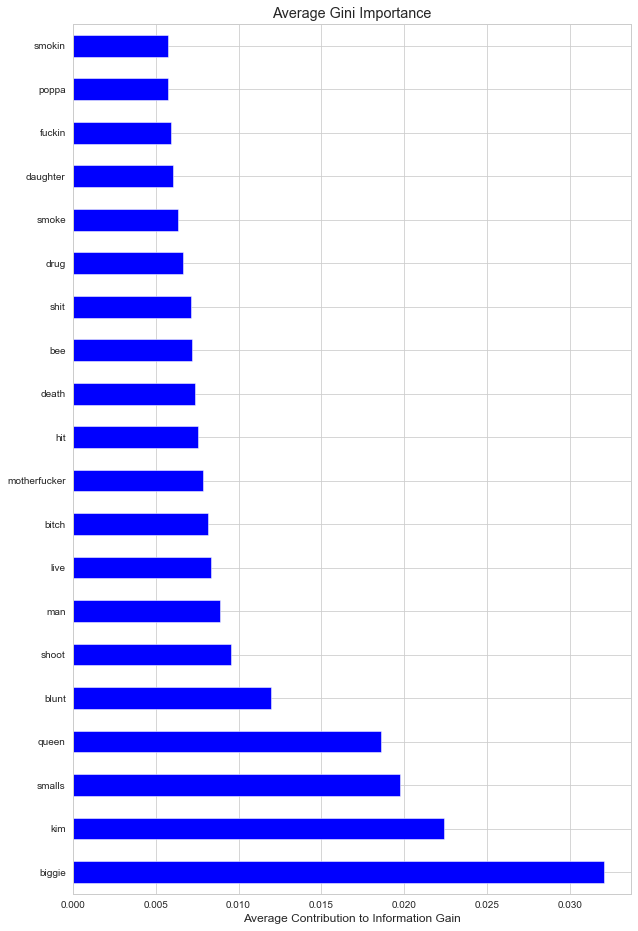

In [505]:
ax = feat_scores[:20].plot(kind='barh', figsize=(10,16), color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average Contribution to Information Gain')

In [488]:
tfidf.get_feature_names()

["'em",
 '--',
 '-45',
 '..',
 '...',
 '....',
 '.......',
 '.22',
 '.223',
 '.22s',
 '.357',
 '.38',
 '.380',
 '.380s',
 '.38s',
 '.44',
 '.44s',
 '.45',
 '.50',
 '.9s',
 '0',
 '020',
 '1',
 '1.5',
 '10',
 '100',
 '101',
 '102',
 '106',
 '108',
 '10:00',
 '10k',
 '10s',
 '11',
 "11'e)cocked",
 "11'k",
 '110',
 '111th',
 '112',
 '11th',
 '12',
 '12-year',
 '13',
 '13th',
 '14',
 '14th',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1970',
 '1993',
 '2',
 '20',
 '2000',
 '2003',
 '2009',
 '21-gun',
 '21st',
 '22',
 '24',
 '24/7',
 '24k',
 '250',
 '250,000',
 '27th',
 '2:19',
 '2pac',
 '3',
 '30',
 '300',
 '32',
 '350',
 '357',
 '365',
 '380',
 '3rd',
 '4',
 '40',
 '45',
 '45th',
 '48',
 '4th',
 '5',
 '50',
 '50-inch',
 '500',
 '500sl',
 '54',
 '560',
 '5th',
 '6',
 "6'2",
 '6.6',
 '60',
 '600',
 '62',
 '68',
 '69',
 '7',
 '7/11',
 '718',
 '75',
 '76',
 '8',
 '8-shot',
 '84',
 '86',
 '8633872',
 '88',
 '9',
 '9,2',
 '9/11',
 '91',
 '911',
 '92',
 '929',
 '93',
 '94',
 '95',
 '96',
 '99',
 '9s',
 

In [493]:
# Gradient Boosting
gbc = GradientBoostingClassifier(learning_rate=0.001,
                                 n_estimators=100000,
                                 random_state=0,
                                 max_depth=20)
gbc.fit(X_train, y_train)
y_predict = gbc.predict(X_test)
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))

0.7640449438202247
0.7368421052631579
0.717948717948718
